## MA755 - 7 Feb 2017

Material from _Chapter 1. End-to-end Machine Learning project_ of

> "[Hands-On Machine Learning with Scikit-Learn and TensorFlow](http://shop.oreilly.com/product/0636920052289.do)"<br>
by Aurélien Géron
Published by O'Reilly Media, Inc., 2017

Author: David Oury

Table of contents

1. Read the dataet (into the notebook)
1. Verify the dataset
1. Explore the dataset
1. Create, modify or drop variables 
1. Create _training_ and _testing_ datasets
1. Split dataset into independent and target/dependent datasets
1. Data cleaning - missing values
1. Custom transformers
1. Pipelines using `sklearn.pipeline`
1. Creating and validating models
1. The `GridSearchCV` function 

Check the installed version of `sklearn`.

In [1]:
import sklearn
sklearn.__version__

'0.18'

### 1. Read the dataset

In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

The file `housing.tgz` is downloaded into the `datasets/housing` directory, which is contained in the same directory as this notebook. The file `housing.csv` is extract from the `housing.tgz` and stored in the same directory.

In [6]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    # `housing_path` is relative to the directory containing this script
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Load the data from the `housing.csv` file into a `DataFrame` Pandas object stored in `housing`. 

In [7]:
housing = load_housing_data()
print(type(housing))

<class 'pandas.core.frame.DataFrame'>


### 2. Verify the dataset

- Check variable types
- Check the values for a few rows
- Produce basic summary statistics (count, mean, median, min, max, quantiles)
- Check your understanding of the meaning of the rows and the units of the numeric variables

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The follow quote indicates the meaning of the rows of the datasets.

> This data has metrics such as the population, median income, median housing price, and so on, for each block group in California. Block groups are the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.

Rows correspond to districts. 

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 3. Explore the dataset 

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


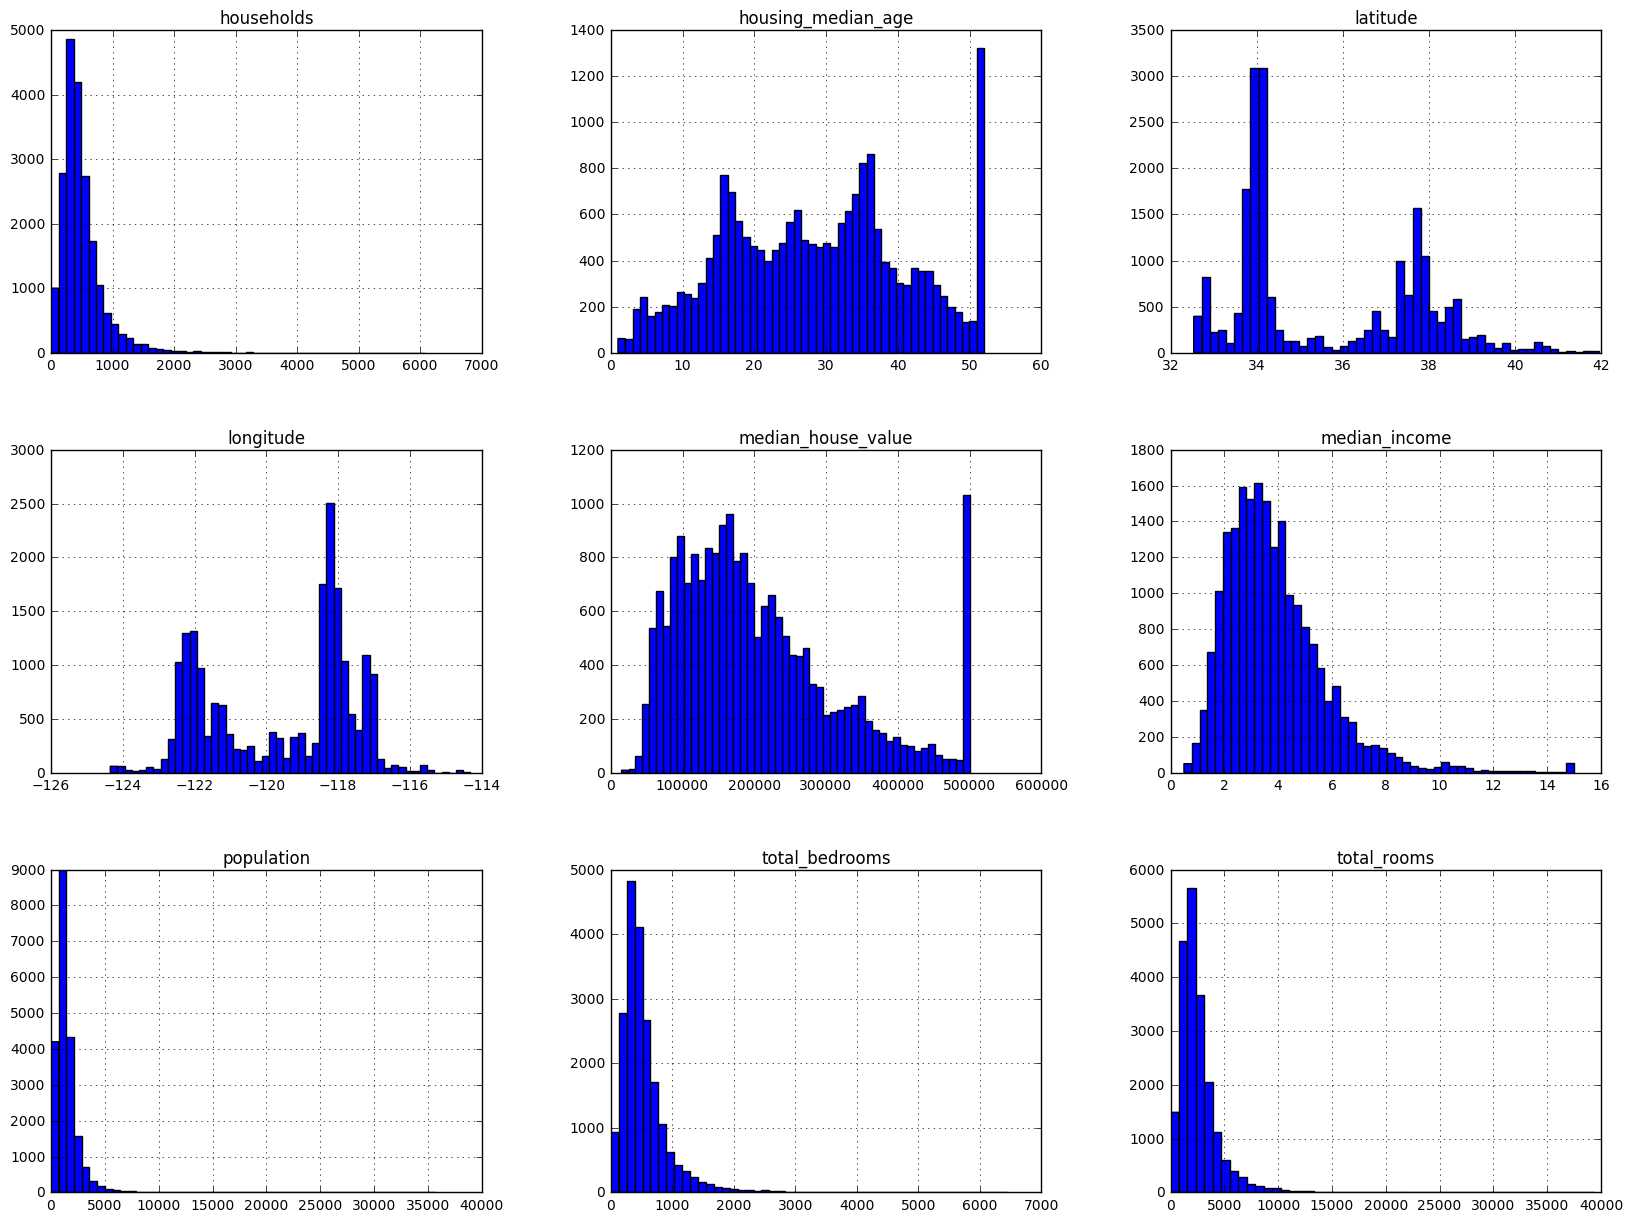

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

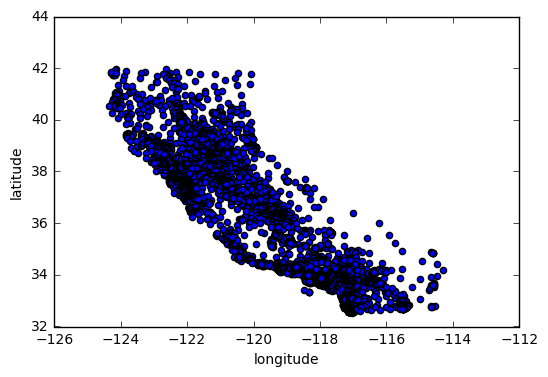

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude")

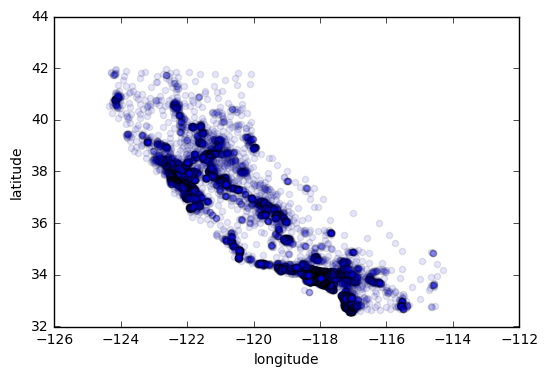

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

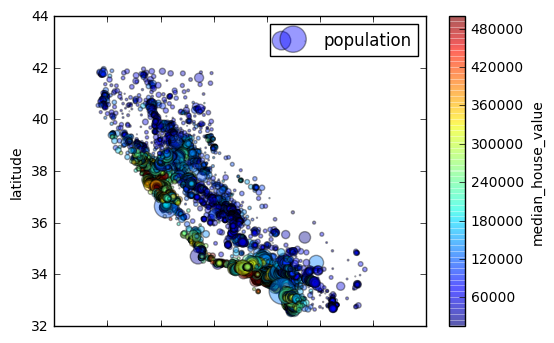

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

#### Correlations between variables

In [16]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79c28ab8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f79c367cd30>]], dtype=object)

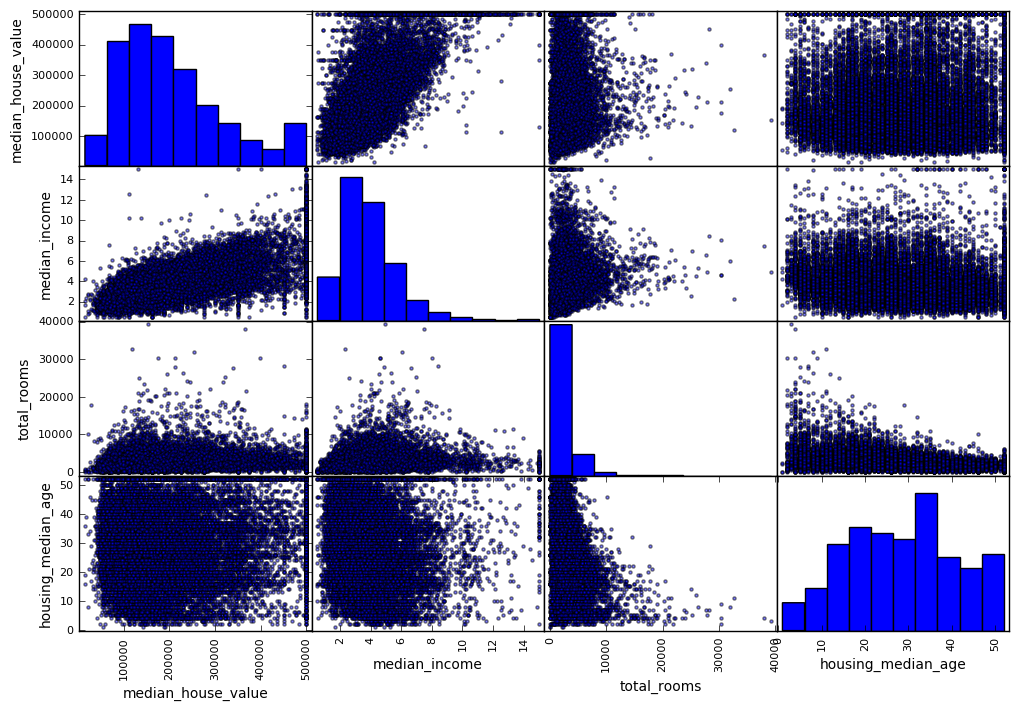

In [18]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

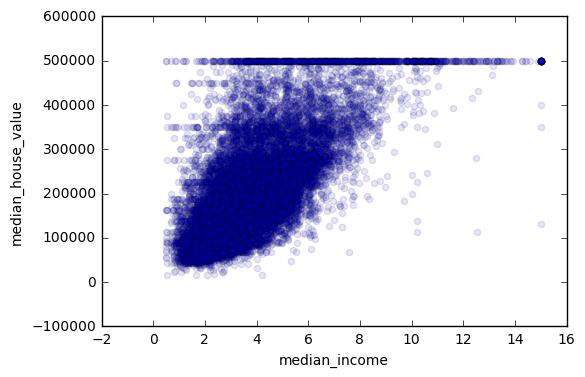

In [19]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)

### 4. Create, modify or drop variables 

New columns/variables can be added "by hand" as you see in the following cell, but there is another method you will see below. 

In [20]:
housing["rooms_per_household"]      = housing["total_rooms"]    / housing["population"]
housing["bedrooms_per_room"]        = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"]     / housing["households"]

### 5. Create _training_ and _testing_ datasets

There are several ways to do this. Each is presented below.

First notice the number of rows (20640) in the dataset.

In [21]:
housing.shape

(20640, 13)

In each case below we create a training data set with 80% of the rows and a test dataset with the remaining 20%. 

Three options will be described below, which create a training and test dataset. The third option (stratified sampling) will be used to create the training and testing datasets to be used in our analysis. 

#### Option 1: Use the `train_test_split` function from the `sklearn.model_selection` package

This is the most common method to split a dataset into train and test datasets.

In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print("train_set: ", train_set.shape)
print("test_set: ", test_set.shape)

train_set:  (16512, 13)
test_set:  (4128, 13)


#### Option 2: Use the `random.permutation` method from Numpy 

Create function `split_train_test` to return the train and test datasets.

This function is equivalent, except that it has no extra parameters, to the `train_test_split` function above.

In [23]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices  = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[ test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

Create the train and test datasets.

In [24]:
train_set, test_set = split_train_test(housing, 0.2)
print("train_set: ", train_set.shape)
print("test_set: ", test_set.shape)

train_set:  (16512, 13)
test_set:  (4128, 13)


#### 3. Stratified sampling

Rows are sampled from each group defined by a categorical variable with the given percentage.

From the `median_income` variable we create a categorical variable `income_cat`,which will be used when creating the stratified samples. 

In [25]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

Create one (since `n_splits=1`) pair of train-test datasets with 20% of the rows in the test dataset. In addition, the test dataset includes 20% of the records where the `income_cat` variable is `1` (or `2`, or `3`, etc.) 

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

print("train_set: ", strat_train_set.shape)
print("test_set: ",  strat_test_set.shape)

train_set:  (16512, 14)
test_set:  (4128, 14)


Notice (below) that the proportion of rows for each value of `income_cat` are identical for the `housing` dataset, for `strat_train_set` and for `strat_test_set`.

In [27]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [28]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [29]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

This next command drops the `income_cat` variable from the train and test datasets. (It can only be run once. The second time it will return an error.)

In [30]:
for dataset in (strat_train_set, strat_test_set):
    dataset.drop(["income_cat"], axis=1, inplace=True)

Use the dataframe in `strat_train_set` for our analysis below. 

It is stored in the `housing` variable. 

Making a copy of a dataset and changing names is not a great idea. It would be better to keep using the original variable name `strat_train_set`.

### 6. Split dataset into independent and target/dependent datasets

Set the target/dependent variable in `housing_labels` to be the `median_house_value` variable.

Drop the `median_house_value` variable from the dataset of independent variables.

In [31]:
housing_labels = strat_train_set["median_house_value"].copy()
housing        = strat_train_set.drop("median_house_value", axis=1)

print(housing_labels.shape)
print(housing.shape)

(16512,)
(16512, 12)


### 7. Data cleaning - missing values

Fix missing values on the training dataset (not the test dataset.) Do not include values from the testing dataset. 

There are (at least) three options for dealing with missing data:
1. Drop the variable from the dataset
1. Drop all rows which have missing values (for the variable)
1. Supply a value to replace the missing values (here the median is used)
1. Use `Imputer` from `sklearn.preprocessing`

Each is described below. The last techniques is used in our analysis.

First though, notice that the number of missing values in the `total_bedrooms` variable.

In [32]:
housing["total_bedrooms"].isnull().sum()

158

#### Option 1: Drop the variable from the dataset

In [33]:
housing.drop("total_bedrooms", axis=1).head(3)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN,2.208451,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN,2.218954,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN,2.085470,0.241291,2.025974


#### Option 2: Drop the cases with missing values for the `total_bedrooms` variable

In [34]:
housing.dropna(subset=["total_bedrooms"])["total_bedrooms"].isnull().sum()

0

#### Option 3: Replace missing values with a specific value (in this case the median)

In [35]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median).isnull().sum()

0

#### Option 4: Use `Imputer` from `sklearn.preprocessing`

The `Imputer` transformer works only on numeric datasets and replaces all missing values, in this case, with the median value for the column containing the missing value. 

In [36]:
housing.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              158
population                    0
households                    0
median_income                 0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           158
population_per_household      0
dtype: int64

In [37]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

As this transformer requires numeric datasets, create the dataset `housing_num` from `housing` by dropping the categorical variable `ocean_proximity`.

In [38]:
housing_num = housing.drop("ocean_proximity", axis=1)

Impute values for all numeric variables in `housing_num` by filling missing values with the median for the column.

The `fit` method essentially calculates the median for each column and finds the missing values. 

In [39]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

The `statistics_` value of the `imputer` object stores the medians for each variable.

In [40]:
all(imputer.statistics_ == housing_num.median().values)

True

In [41]:
X = imputer.transform(housing_num)

In [42]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Now we have a new dataframe `housing_tr` with missing values filled by the median.

In [43]:
housing_tr.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

#### Create dummy variables for  `ocean_proximity` (categorical variable)

First we encode it as numeric. 

In [44]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [45]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


But it doesn't make sense to have "`INLAND`" and "`ISLAND`" be close (numerically) and have "`OCEAN`" and "`NEAR OCEAN`" be more distant (numerically.)

The solution is to use _one hot_ encoding to create dummy variables. Use the `LabelBinarizer` transformer as follows.

In [1]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

NameError: name 'housing_cat' is not defined

In [47]:
print(type(housing_cat))
print(type(housing_cat_1hot))
print(housing_cat[:3])
housing_cat_1hot[:3]

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
Name: ocean_proximity, dtype: object


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

### 8. Custom transformers

The `Imputer` and `LabelBinarizer` are _transformers_. 

Transformers take a dataframe as input and return a numpy array as output. I'd guess that they can also take a numpy array as input. 

A custom transformer called `CombinedAttributesAdder` is created below.
It creates new variables. 

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

Transform the `housing_values` numpy array to add the extra columns.

In [49]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

print(type(housing_extra_attribs))
print(housing.shape, housing_extra_attribs.shape)
housing_extra_attribs[:3]

<class 'numpy.ndarray'>
(16512, 12) (16512, 14)


array([[-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
        '<1H OCEAN', 2.2084507042253523, 0.22385204081632654,
        2.094395280235988, 4.625368731563422, 2.094395280235988],
       [-121.93, 37.05, 14.0, 679.0, 108.0, 306.0, 113.0, 6.4214,
        '<1H OCEAN', 2.218954248366013, 0.15905743740795286,
        2.7079646017699117, 6.008849557522124, 2.7079646017699117],
       [-117.2, 32.77, 31.0, 1952.0, 471.0, 936.0, 462.0, 2.8621,
        'NEAR OCEAN', 2.0854700854700856, 0.24129098360655737,
        2.0259740259740258, 4.225108225108225, 2.0259740259740258]], dtype=object)

In the next section we take the transformers we have created and put them together into a single sequence. 

### 8. Pipelines using `sklearn.pipeline`

At this point we have three (3) transformers. They are:
1. Impute Missing values
1. Create dummy variables (using 1 hot encoding)
1. Create extra variables 

There are additional transformers (see below) that are often used to prepare datasets for machine learning models. 

The `Pipeline` function chains transformers together, applies each in sequence and returns the final transformation. 

The following pipeline process takes a dataframe (with only numeric columns) as input and returns a numpy array as output. It: 
1. replaces missing values with the median value for that column
1. adds attributes using the customer transformer defined above
1. scales all variables so that the mean and standard deviation are both 1

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer'      , Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler'   , StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Notice the types of the pipeline input and output.

In [51]:
type(housing_num), type(housing_num_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

Notice that:
- new variables have been added
- the values are all scaled 

In [52]:
print(housing_num.shape, housing_num_tr.shape)

housing_num_tr[:,2].mean(), housing_num_tr[:,2].std()

(16512, 11) (16512, 14)


(-4.7012350945852072e-17, 0.99999999999999989)

Create the `DataFrameSelector` class. It seems to retreive specific rows from the `X` dataframe.

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Create pipelines for the numeric fields and for the categorical field. Then create a single pipeline by _concatenating_ these two pipelines

The `FeatureUnion` object "_Concatenates results of multiple transformer objects._" I assume that concatenate means adding new features. 

In [54]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector'     , DataFrameSelector(num_attribs)),
        ('imputer'      , Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler'   , StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector'       , DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

Now do the work and transform the `housing` dataframe into the `housing_prepared` numpy array.

In [55]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

The `housing_prepared` dataframe will be used in the machine learning models in the next section.

### 9. Creating and validating models

Fit a regression model to the prepared data to predict the labels.

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Create a (small) dataframe `some_data`. Create the corresponding labels `some_labels`. Then transform the data and make predictions. 

In [57]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 221026.27573227  320375.22337448  218392.82797021   47126.06278761
  185655.90160754]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Now make predictions from the model created above using the `housing_prepared` data. 

In [58]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66988.058957303758

We will improve on this prediction later. 

### Decision tree model

Now we create a decision tree model from the data in `housing_prepared` and `housing_labels`.

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

From this model make predictions for the `housing_prepared` data. 

In [60]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Notice the model made all correct predictions. This is called _over fitting_. This also violated a rule of machine learning: never test your data on the same dataset used to create the model. 

### Cross-validation

Perform cross-validation on a collection of models.

Define a function to find the mean and standard deviation of the scores.

In [ ]:
def display_scores(scores):
    print("Mean:", scores.mean())
    print("Std dev:", scores.std())
    print("Scores:", scores)

First use the decision tree model created above.

In [69]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-tree_scores)

Display the root mean square errors for each of the ten validations. 

In [73]:
display_scores(tree_rmse_scores)

Mean: 70571.8747857
Std dev: 2587.43232467
Scores: [ 69506.08026109  68826.56087942  72251.043627    68451.4788388
  70913.51769446  73595.93057455  70044.71541642  65749.65914872
  75305.19756577  71074.56385076]


Now use the linear regression model created above.

In [74]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Mean: 67788.7882481
Std dev: 2323.68290156
Scores: [ 64390.34711598  65974.69195641  66487.23412236  70607.52685338
  66392.33154797  69597.66975991  70433.07370405  66984.3402085
  71304.30596222  65716.36125044]


Now create a random forest model.

In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_predictions = forest_reg.predict(housing_prepared)

In [77]:
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores
display_scores(forest_rmse_scores)

Mean: 51627.1445731
Std dev: 2156.05859453
Scores: [ 52191.73237071  48940.17955453  51870.99643057  54374.7055365
  50755.87759876  54703.97445379  49684.90619697  48651.11944589
  54390.74758249  50707.20656105]


The mean score for this random forest model is the best so far. 

### 11. The `GridSearchCV` function of the `sklearn.model_section` package

The `GridSearchCV` function allows to try different hyper-parameters (which are parameters of the model.)

In [78]:
from sklearn.model_selection import GridSearchCV

The `param_grid` list contains the options for the model parameters, in this case of the random forest model.

The `RandomForestRegressor` has parameters that we investigate: `bootstrap`, `n_estimators` and `max_features`. 
The default value of `bootstrap` is `True`.

In [81]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

Create the random forest _regressor_. 

In [82]:
forest_reg = RandomForestRegressor()

Setup the grid search.

In [83]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Find the parameters which produce the best predictions. 

In [84]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Display the best parameters and best estimator.

In [92]:
grid_search.best_params_, grid_search.best_estimator_

({'max_features': 8, 'n_estimators': 30},
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False))

The following displays the mean square error alongside the parameters. 

In [90]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

66599.5076405 {'n_estimators': 3, 'max_features': 2}
56332.9031587 {'n_estimators': 10, 'max_features': 2}
54370.6457351 {'n_estimators': 30, 'max_features': 2}
61685.890533 {'n_estimators': 3, 'max_features': 4}
54404.692178 {'n_estimators': 10, 'max_features': 4}
51749.200248 {'n_estimators': 30, 'max_features': 4}
60666.5002544 {'n_estimators': 3, 'max_features': 6}
53432.8663779 {'n_estimators': 10, 'max_features': 6}
51170.9683826 {'n_estimators': 30, 'max_features': 6}
59765.7103385 {'n_estimators': 3, 'max_features': 8}
52463.3366449 {'n_estimators': 10, 'max_features': 8}
50584.849706 {'n_estimators': 30, 'max_features': 8}
63761.8601909 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
56092.6618301 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
61423.7843361 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
54429.7336547 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
60083.7540222 {'n_estimators': 3, 'max_features': 4, 'bootstrap': 

In [94]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  6.32853251e-02,   6.00758522e-02,   3.80553599e-02,
         1.23970308e-02,   1.24681440e-02,   1.26289675e-02,
         1.24678507e-02,   3.47910475e-01,   9.11106833e-02,
         3.17744310e-02,   5.14298762e-02,   2.54086900e-02,
         4.30698726e-02,   3.10445381e-02,   6.72450830e-03,
         1.54776373e-01,   3.62637766e-05,   2.40847471e-03,
         2.92728428e-03])

We have been training our models using the `strat_train_set` dataframe. 

Now evaluate the best model on the `strat_test_set` dataframe.

In [91]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 48,209.6
final_rmse

48866.358265219096

In general for a dataset:
1. Read and explore the dataset
1. Remove or add variables/columns
1. Create train and test datasets
1. Setup transformations and a pipeline
1. Explore models
1. Determine best parameters (and models)

The end